In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
X,y = datasets.make_regression(n_samples=200,n_features=1,n_targets=1,noise=10)

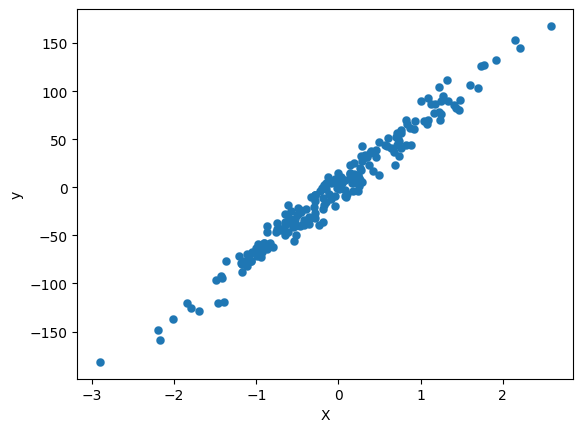

In [5]:
plt.scatter(X,y,linewidths=0.1) ## 檢視數據X,y分佈
plt.xlabel("X") ## 加入，方便看
plt.ylabel("y") ## 加入，方便看
plt.show()

In [6]:
X.shape, X[:200,:].shape ## they are equal

((200, 1), (200, 1))

In [7]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [8]:
!pip install mlflow -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 752.6/752.6 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 12.4 MB/s eta 0:00:00


In [9]:
import mlflow.sklearn
from urllib.parse import urlparse
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
input_example = X[0:2]
input_example

array([[-0.65343771],
       [-0.53470342]])

In [11]:
tracking_url_type_store=urlparse(mlflow.get_tracking_uri()).scheme
print(tracking_url_type_store) ## Lecture Demo 測試

file


In [12]:
import numpy as np

with mlflow.start_run():

    y_pred= model.predict(X[:200,:]) ## X[:200,:] 就是 X

    rmse = np.sqrt(mean_squared_error(y, y_pred)) # here is RMSE
    mae = mean_absolute_error(y, y_pred)          # here is MAE
    r2 = r2_score(y, y_pred)                      # here is r3 value

    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mae", mae)

    # Model registry does not work with file store
    if tracking_url_type_store != "file": ## set one cloud location, you won't get 'file' over here.
        mlflow.sklearn.log_model(model, "model", registered_model_name="ml_model")
    else:
        #mlflow.sklearn.log_model(model, "model") ## deprecated 已廢棄
        mlflow.sklearn.log_model(sk_model=model, name="my_sklearn_model",input_example=input_example)

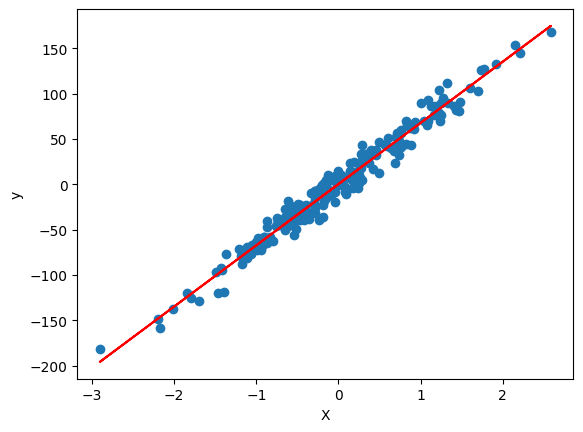

In [14]:
plt.plot(X,y_pred,c="red")
plt.scatter(X,y)
plt.xlabel("X") ## 加入，方便看
plt.ylabel("y") ## 加入，方便看
plt.show()

---

In [15]:
!pip install -q condacolab
import condacolab
condacolab.install() # expect a kernel restart

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:10
🔁 Restarting kernel...


In [1]:
!conda create -p env python=3.8 -y -q

Channels:
 - conda-forge
Platform: linux-64
Solving environment: ...working... done

## Package Plan ##

  environment location: /content/env

  added / updated specs:
    - python=3.8


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bzip2-1.0.8                |       hda65f42_8         254 KB  conda-forge
    ca-certificates-2025.10.5  |       hbd8a1cb_0         152 KB  conda-forge
    ld_impl_linux-64-2.44      |       h1aa0949_4         725 KB  conda-forge
    libffi-3.5.2               |       h9ec8514_0          56 KB  conda-forge
    libgcc-15.2.0              |       h767d61c_7         803 KB  conda-forge
    libgcc-ng-15.2.0           |       h69a702a_7          29 KB  conda-forge
    libgomp-15.2.0             |       h767d61c_7         437 KB  conda-forge
    liblzma-5.8.1              |       hb9d3cd8_2         110 KB  conda-forge
    liblzma-devel-5.8.1        |       hb9d3c

In [2]:
%%writefile requirements_dev.txt
pandas
scikit-learn
numpy
seaborn
mlflow==2.2.2

Writing requirements_dev.txt


In [3]:
!source activate ./env; pip install -r requirements_dev.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 113.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 136.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 163.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 134.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.0/806.0 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.6/538.6 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.0/606.0 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/

In [6]:
%%bash
source activate ./env

python


from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import datasets

X,y = datasets.make_regression(n_samples=200,n_features=1,n_targets=1,noise=10)

model = LinearRegression()
model.fit(X,y)

import mlflow.sklearn
from urllib.parse import urlparse
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

input_example = X[0:2]

tracking_url_type_store=urlparse(mlflow.get_tracking_uri()).scheme
print(tracking_url_type_store) ## Lecture Demo 測試

import numpy as np

with mlflow.start_run():

    y_pred= model.predict(X[:200,:]) ## X[:200,:] 就是 X

    rmse = np.sqrt(mean_squared_error(y, y_pred)) # here is RMSE
    mae = mean_absolute_error(y, y_pred)          # here is MAE
    r2 = r2_score(y, y_pred)                      # here is r3 value

    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mae", mae)

    # Model registry does not work with file store
    if tracking_url_type_store != "file": ## set one cloud location, you won't get 'file' over here.
        mlflow.sklearn.log_model(model, "model", registered_model_name="ml_model")
    else:
        mlflow.sklearn.log_model(model, "model") ## deprecated 已廢棄
        #mlflow.sklearn.log_model(sk_model=model, name="my_sklearn_model",input_example=input_example)

file


/content/env/lib/python3.8/site-packages/_distutils_hack/__init__.py:31: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
Traceback (most recent call last):
  File "<stdin>", line 39, in <module>
  File "/content/env/lib/python3.8/site-packages/mlflow/sklearn/__init__.py", line 424, in log_model
    return Model.log(
  File "/content/env/lib/python3.8/site-packages/mlflow/models/model.py", line 552, in log
    mlflow.tracking.fluent.log_artifacts(local_path, mlflow_model.artifact_path)
  File "/content/env/lib/python3.8/site-packages/mlflow/tracking/fluent.py", line 817, in log_artifacts
    MlflowClient().log_artifacts(run_id, local_dir, artifact_path)
  File "/content/env/lib/python3.8/site-packages/mlflow/tracking/client.py", line 1069, in log_artifacts
    sel

CalledProcessError: Command 'b'source activate ./env\n\npython\n\n\nfrom sklearn.linear_model import LinearRegression\nimport matplotlib.pyplot as plt\nfrom sklearn import datasets\n\nX,y = datasets.make_regression(n_samples=200,n_features=1,n_targets=1,noise=10)\n\nmodel = LinearRegression()\nmodel.fit(X,y)\n\nimport mlflow.sklearn\nfrom urllib.parse import urlparse\nfrom sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score\n\ninput_example = X[0:2]\n\ntracking_url_type_store=urlparse(mlflow.get_tracking_uri()).scheme \nprint(tracking_url_type_store) ## Lecture Demo \xe6\xb8\xac\xe8\xa9\xa6\n\nimport numpy as np\n\nwith mlflow.start_run():\n\n    y_pred= model.predict(X[:200,:]) ## X[:200,:] \xe5\xb0\xb1\xe6\x98\xaf X\n\n    rmse = np.sqrt(mean_squared_error(y, y_pred)) # here is RMSE\n    mae = mean_absolute_error(y, y_pred)          # here is MAE\n    r2 = r2_score(y, y_pred)                      # here is r3 value\n\n    mlflow.log_metric("rmse", rmse)\n    mlflow.log_metric("r2", r2)\n    mlflow.log_metric("mae", mae)\n\n    # Model registry does not work with file store\n    if tracking_url_type_store != "file": ## set one cloud location, you won\'t get \'file\' over here.\n        mlflow.sklearn.log_model(model, "model", registered_model_name="ml_model")\n    else:\n        mlflow.sklearn.log_model(model, "model") ## deprecated \xe5\xb7\xb2\xe5\xbb\xa2\xe6\xa3\x84\n        #mlflow.sklearn.log_model(sk_model=model, name="my_sklearn_model",input_example=input_example)\n'' returned non-zero exit status 1.

In [ ]:
plt.plot(X,y_pred,c="red")
plt.scatter(X,y)
plt.xlabel("X") ## 加入，方便看
plt.ylabel("y") ## 加入，方便看
plt.show()